In [1]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [2]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [5]:
df= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/ExecutiveSumPfs_Parag.xlsx')
df.head()

,Unnamed: 0,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito...
2,2,international monetary fund | april 2018 xith...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...


In [11]:
df=df.drop(df.columns[0], axis=1)
df.head()

,Context
0,x international monetary fund | april 2020 exe...
1,international monetary fund | april 2020 xito ...
2,international monetary fund | april 2018 xithe...
3,xii international monetary fund | april 2018 g...
4,x international monetary fund | october 2017 n...


In [8]:
df=df.dropna().reset_index()
len(df)

164

In [9]:
df

,index,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito...
2,2,international monetary fund | april 2018 xith...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...
...,...,...
159,161,setting the stage for a more robust global fin...
160,162,executive summary border and cross-functiona...
161,163,executive summary to valuation reserves or a...
162,164,executive summary settle across borders and ...


In [10]:
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

,index,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito ...
2,2,international monetary fund | april 2018 xithe...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...
...,...,...
159,161,setting stage robust global financial system i...
160,162,executive summary border cross-functional regu...
161,163,executive summary valuation reserves adjustmen...
162,164,executive summary settle across borders multip...


In [12]:
import nltk
from nltk.tokenize import sent_tokenize

# Download the NLTK sentence tokenizer data
nltk.download('punkt')

def get_sentences(paragraph):
    # Tokenize the paragraph into sentences
    sentences = sent_tokenize(paragraph)
    return sentences

[nltk_data] Downloading package punkt to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df_list=df["Context"].values.tolist()
df_list

['x international monetary fund | april 2020 executive summary coronavirus (covid-19) pandemic presents historic challenge. mid-february, market participants started fear outbreak would become global pandemic, prices equities fell sharply, previously overstretched levels. credit markets, spreads skyrocketed, especially risky segments high-yield bonds, leveraged loans, private debt, issuance essentially came halt. oil prices plummeted face weakening global demand failure opec+ countries reach agreement output cuts, adding leg deterioration risk appetite. volatile market conditions led flight quality, yields safe-haven bonds declining abruptly. number factors amplified asset price moves, contributing sharp tightening financial conditions unprecedented speed. signs strain emerged major short-term funding markets, including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago. market liquidity deteriorated considerably, including markets traditi

In [14]:
df_list=get_sentences(str(df_list))
df_list

["['x international monetary fund | april 2020 executive summary coronavirus (covid-19) pandemic presents historic challenge.",
 'mid-february, market participants started fear outbreak would become global pandemic, prices equities fell sharply, previously overstretched levels.',
 'credit markets, spreads skyrocketed, especially risky segments high-yield bonds, leveraged loans, private debt, issuance essentially came halt.',
 'oil prices plummeted face weakening global demand failure opec+ countries reach agreement output cuts, adding leg deterioration risk appetite.',
 'volatile market conditions led flight quality, yields safe-haven bonds declining abruptly.',
 'number factors amplified asset price moves, contributing sharp tightening financial conditions unprecedented speed.',
 'signs strain emerged major short-term funding markets, including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago.',
 'market liquidity deteriorated considera

In [15]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("•","");
    text=re.sub('\[\' ','',text)
    text=re.sub('\[\'','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [16]:
text_clean_1(df_list[3])

'oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite'

In [17]:
len(df_list)

3379

In [18]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['x international monetary fund  april 2020 executive summary coronavirus covid19 pandemic presents historic challenge',
 'midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels',
 'credit markets spreads skyrocketed especially risky segments highyield bonds leveraged loans private debt issuance essentially came halt',
 'oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite',
 'volatile market conditions led flight quality yields safehaven bonds declining abruptly',
 'number factors amplified asset price moves contributing sharp tightening financial conditions unprecedented speed',
 'signs strain emerged major shortterm funding markets including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago',
 'market liquidity deteriorated considerably including markets traditio

In [19]:
type(doc)

list

In [20]:
doc[1]

'midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels'

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(doc))

print(data_words[:1])

[['international', 'monetary', 'fund', 'april', 'executive', 'summary', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge']]


In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['international', 'monetary', 'fund', 'april', 'executive', 'summary', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge']


In [23]:
# Define functions for bigrams, trigrams and lemmatization
import io
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['international', 'monetary', 'summary', 'coronavirus', 'covid', 'present', 'historic', 'challenge']]


In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [26]:
id2word[0]

'challenge'

In [27]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('challenge', 1),
  ('coronavirus', 1),
  ('covid', 1),
  ('historic', 1),
  ('international', 1),
  ('monetary', 1),
  ('present', 1),
  ('summary', 1)]]

In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.049*"market" + 0.016*"asset" + 0.013*"emerge" + 0.012*"credit" + 0.009*"country" + 0.008*"chapter" + 0.008*"capital" + 0.008*"investor" + 0.008*"increase" + 0.007*"funding"'), (1, '0.023*"risk" + 0.022*"financial" + 0.020*"bank" + 0.015*"policy" + 0.014*"need" + 0.013*"institution" + 0.010*"system" + 0.008*"liquidity" + 0.007*"sector" + 0.007*"systemic"')]


In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.29533539745957

Coherence Score:  0.3782217330389065


In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.380277  0.254062       1        1  24.734595
9     -0.176815 -0.357817       2        1  10.811362
7     -0.082966 -0.061691       3        1   6.512048
10    -0.045805 -0.028543       4        1   6.038615
5     -0.046285 -0.028178       5        1   6.032523
12    -0.042936 -0.025560       6        1   5.878741
19    -0.073701 -0.051752       7        1   5.419875
17    -0.071258  0.036859       8        1   5.316595
8      0.042599  0.014674       9        1   3.844110
16     0.020569  0.007255      10        1   3.817447
6      0.020787  0.006706      11        1   3.621262
2      0.069429  0.021756      12        1   2.783305
0      0.057575  0.018779      13        1   2.716280
14     0.079894  0.023910      14        1   2.651515
1      0.082998  0.024655      15        1   2.565731
4      0.096290  0.027119      16        1   2.106615
13     0.106704  0.028774      17        1   1.673809
11     0.108975  0.028995      18        1   1.399290
18     0.120131  0.030316      19        1   1.095103
15     0.114090  0.029683      20        1   0.981179, topic_info=             Term         Freq        Total Category  logprob  loglift
14         market  1723.000000  1723.000000  Default  30.0000  30.0000
167          bank  1188.000000  1188.000000  Default  29.0000  29.0000
55           risk  1687.000000  1687.000000  Default  28.0000  28.0000
201          need   710.000000   710.000000  Default  27.0000  27.0000
70      financial  1415.000000  1415.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1263  uncertainty     0.040926     1.412711  Topic20  -9.4144   1.0827
978          area     0.040926     1.412918  Topic20  -9.4144   1.0825
890       overall     0.040925     1.412617  Topic20  -9.4145   1.0827
1242    structure     0.040925     1.412977  Topic20  -9.4145   1.0825
1558     relevant     0.040925     1.412493  Topic20  -9.4145   1.0828

[816 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
259       7  0.934625    absorb
333      13  0.958470    access
112       2  0.993037    action
175       8  0.984787  activity
40        5  0.962566       add
...     ...       ...       ...
174      13  0.994467      well
393      10  0.981822      wide
380      15  0.936814     world
404      16  0.986846      year
65        5  0.982858     yield

[400 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 8, 11, 6, 13, 20, 18, 9, 17, 7, 3, 1, 15, 2, 5, 14, 12, 19, 16])

In [34]:
#Building LDA Mallet Model
#gensim version 4.3.0
#If your work depends on any of the modules below, feel free to copy it out of Gensim 3.8.3 (the last release where they appear), and extend & maintain the wrapper yourself.
#import os
#from gensim.models.wrappers import LdaMallet
#mallet_path = 'C:/Users/Buket Fildisi/mallet-2.0.8/bin/mallet' # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [35]:
#How to find optimal number of topic


In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        #gensim.models.wrappers.LdaMallet( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
# Takes a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

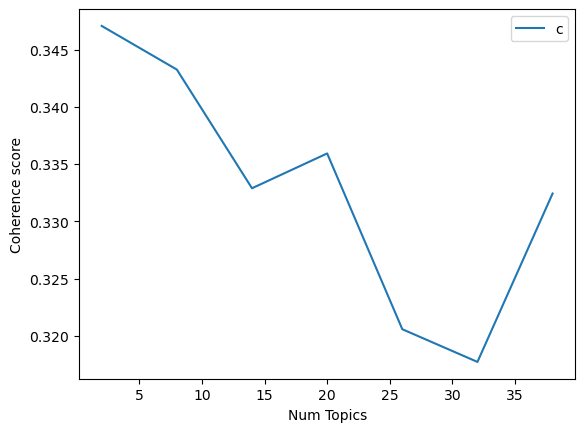

In [38]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
#If the coherence score seems to keep increasing, 
#it may make better sense to pick the model that gave the highest CV before flattening out.
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3471
Num Topics = 8  has Coherence Value of 0.3433
Num Topics = 14  has Coherence Value of 0.3329
Num Topics = 20  has Coherence Value of 0.3359
Num Topics = 26  has Coherence Value of 0.3206
Num Topics = 32  has Coherence Value of 0.3177
Num Topics = 38  has Coherence Value of 0.3324


In [40]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.021*"financial" + 0.016*"bank" + 0.012*"market" + 0.011*"policy" + 0.008*"risk" + 0.008*"asset" + 0.008*"capital" + 0.008*"credit" + 0.007*"institution" + 0.007*"global"'), (1, '0.029*"market" + 0.024*"risk" + 0.010*"financial" + 0.010*"bank" + 0.009*"need" + 0.008*"emerge" + 0.008*"policy" + 0.007*"liquidity" + 0.006*"economy" + 0.006*"credit"')]


In [41]:
visOpt = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
visOpt
#we can see the optimal topic number 

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
1      0.029438  0.0       1        1  51.00283
0     -0.029438  0.0       2        1  48.99717, topic_info=          Term         Freq        Total Category  logprob  loglift
55        risk   842.000000   842.000000  Default  30.0000  30.0000
14      market  1071.000000  1071.000000  Default  29.0000  29.0000
70   financial   795.000000   795.000000  Default  28.0000  28.0000
237    provide   139.000000   139.000000  Default  27.0000  27.0000
469     reform   116.000000   116.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
130    economy   120.613743   288.598548   Topic2  -5.3366  -0.1590
85     include    99.564268   190.783453   Topic2  -5.5284   0.0631
475      sheet    97.356276   183.708200   Topic2  -5.5508   0.0784
95   liquidity   115.818935   300.228437   Topic2  -5.3772  -0.2391
83      emerge   102.975716   318.152193   Topic2  -5.4947  -0.4146

[204 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
41        1  0.116135  agreement
41        2  0.812943  agreement
762       1  0.207248      allow
762       2  0.799387      allow
252       1  0.591979       also
...     ...       ...        ...
1765      2  0.168832         yr
1236      1  0.906684     ﬁnance
1236      2  0.090668     ﬁnance
2013      1  0.937466        ﬂow
2013      2  0.055145        ﬂow

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [42]:
#to find dominant topic in each doc
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_25616\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_25616\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_25616\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8768,"financial, bank, market, policy, risk, asset, ...","[international, monetary, summary, coronavirus..."
1,1,1,0.6652,"market, risk, financial, bank, need, emerge, p...","[midfebruary, market, participant, start, fear..."
2,2,1,0.8264,"market, risk, financial, bank, need, emerge, p...","[credit, market, spread, skyrocket, especially..."
3,3,0,0.7867,"financial, bank, market, policy, risk, asset, ...","[oil, price, plummet, face, weaken, global, de..."
4,4,1,0.9109,"market, risk, financial, bank, need, emerge, p...","[volatile, market, condition, lead, flight, qu..."
5,5,0,0.9495,"financial, bank, market, policy, risk, asset, ...","[number, factor, amplify, asset, price, move, ..."
6,6,1,0.6869,"market, risk, financial, bank, need, emerge, p...","[sign, emerge, major, shortterm, funding, mark..."
7,7,1,0.8928,"market, risk, financial, bank, need, emerge, p...","[market, liquidity, deteriorate, considerably,..."
8,8,0,0.9524,"financial, bank, market, policy, risk, asset, ...","[leverage, investor, come, pressure, reportedl..."
9,9,1,0.6524,"market, risk, financial, bank, need, emerge, p...","[however, market, pare, loss]"


In [43]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8768,"financial, bank, market, policy, risk, asset, ...","[international, monetary, summary, coronavirus..."
1,1,1,0.6652,"market, risk, financial, bank, need, emerge, p...","[midfebruary, market, participant, start, fear..."
2,2,1,0.8264,"market, risk, financial, bank, need, emerge, p...","[credit, market, spread, skyrocket, especially..."
3,3,0,0.7867,"financial, bank, market, policy, risk, asset, ...","[oil, price, plummet, face, weaken, global, de..."
4,4,1,0.9109,"market, risk, financial, bank, need, emerge, p...","[volatile, market, condition, lead, flight, qu..."
...,...,...,...,...,...
3374,3374,0,0.9598,"financial, bank, market, policy, risk, asset, ...","[international, accounting, standard, board, f..."
3375,3375,0,0.8639,"financial, bank, market, policy, risk, asset, ...","[on, review, guideline, good, practice]"
3376,3376,0,0.9503,"financial, bank, market, policy, risk, asset, ...","[part, revamp, fina, ncial, sector, assessment..."
3377,3377,0,0.8672,"financial, bank, market, policy, risk, asset, ...","[joint, early, warning, exercise, conduct, coo..."


In [44]:
df_dominant_topic.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Results/ExecutiveSummary_sentences.xlsx')

In [45]:
#Topic Distribution 
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0,"financial, bank, market, policy, risk, asset, ...",1720.0,0.509
1,1,"market, risk, financial, bank, need, emerge, p...",1659.0,0.491
2,1,"market, risk, financial, bank, need, emerge, p...",NaN,NaN
3,0,"financial, bank, market, policy, risk, asset, ...",NaN,NaN
4,1,"market, risk, financial, bank, need, emerge, p...",NaN,NaN
...,...,...,...,...
3374,0,"financial, bank, market, policy, risk, asset, ...",NaN,NaN
3375,0,"financial, bank, market, policy, risk, asset, ...",NaN,NaN
3376,0,"financial, bank, market, policy, risk, asset, ...",NaN,NaN
3377,0,"financial, bank, market, policy, risk, asset, ...",NaN,NaN


In [46]:
d = df_dominant_topics['Topic_Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

'financial, bank, market, policy, risk, asset, capital, credit, institution, global market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit financial, bank, market, policy, risk, asset, capital, credit, institution, global market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit financial, bank, market, policy, risk, asset, capital, credit, institution, global market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit financial, bank, market, policy, risk, asset, capital, credit, institution, global market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit market, risk, financial, bank, need, emerge, policy, liquidity, economy, credit financial, bank, market, policy, risk, asset, capital, credit, institution, global market, risk, financial,

In [47]:
from wordcloud import WordCloud, STOPWORDS

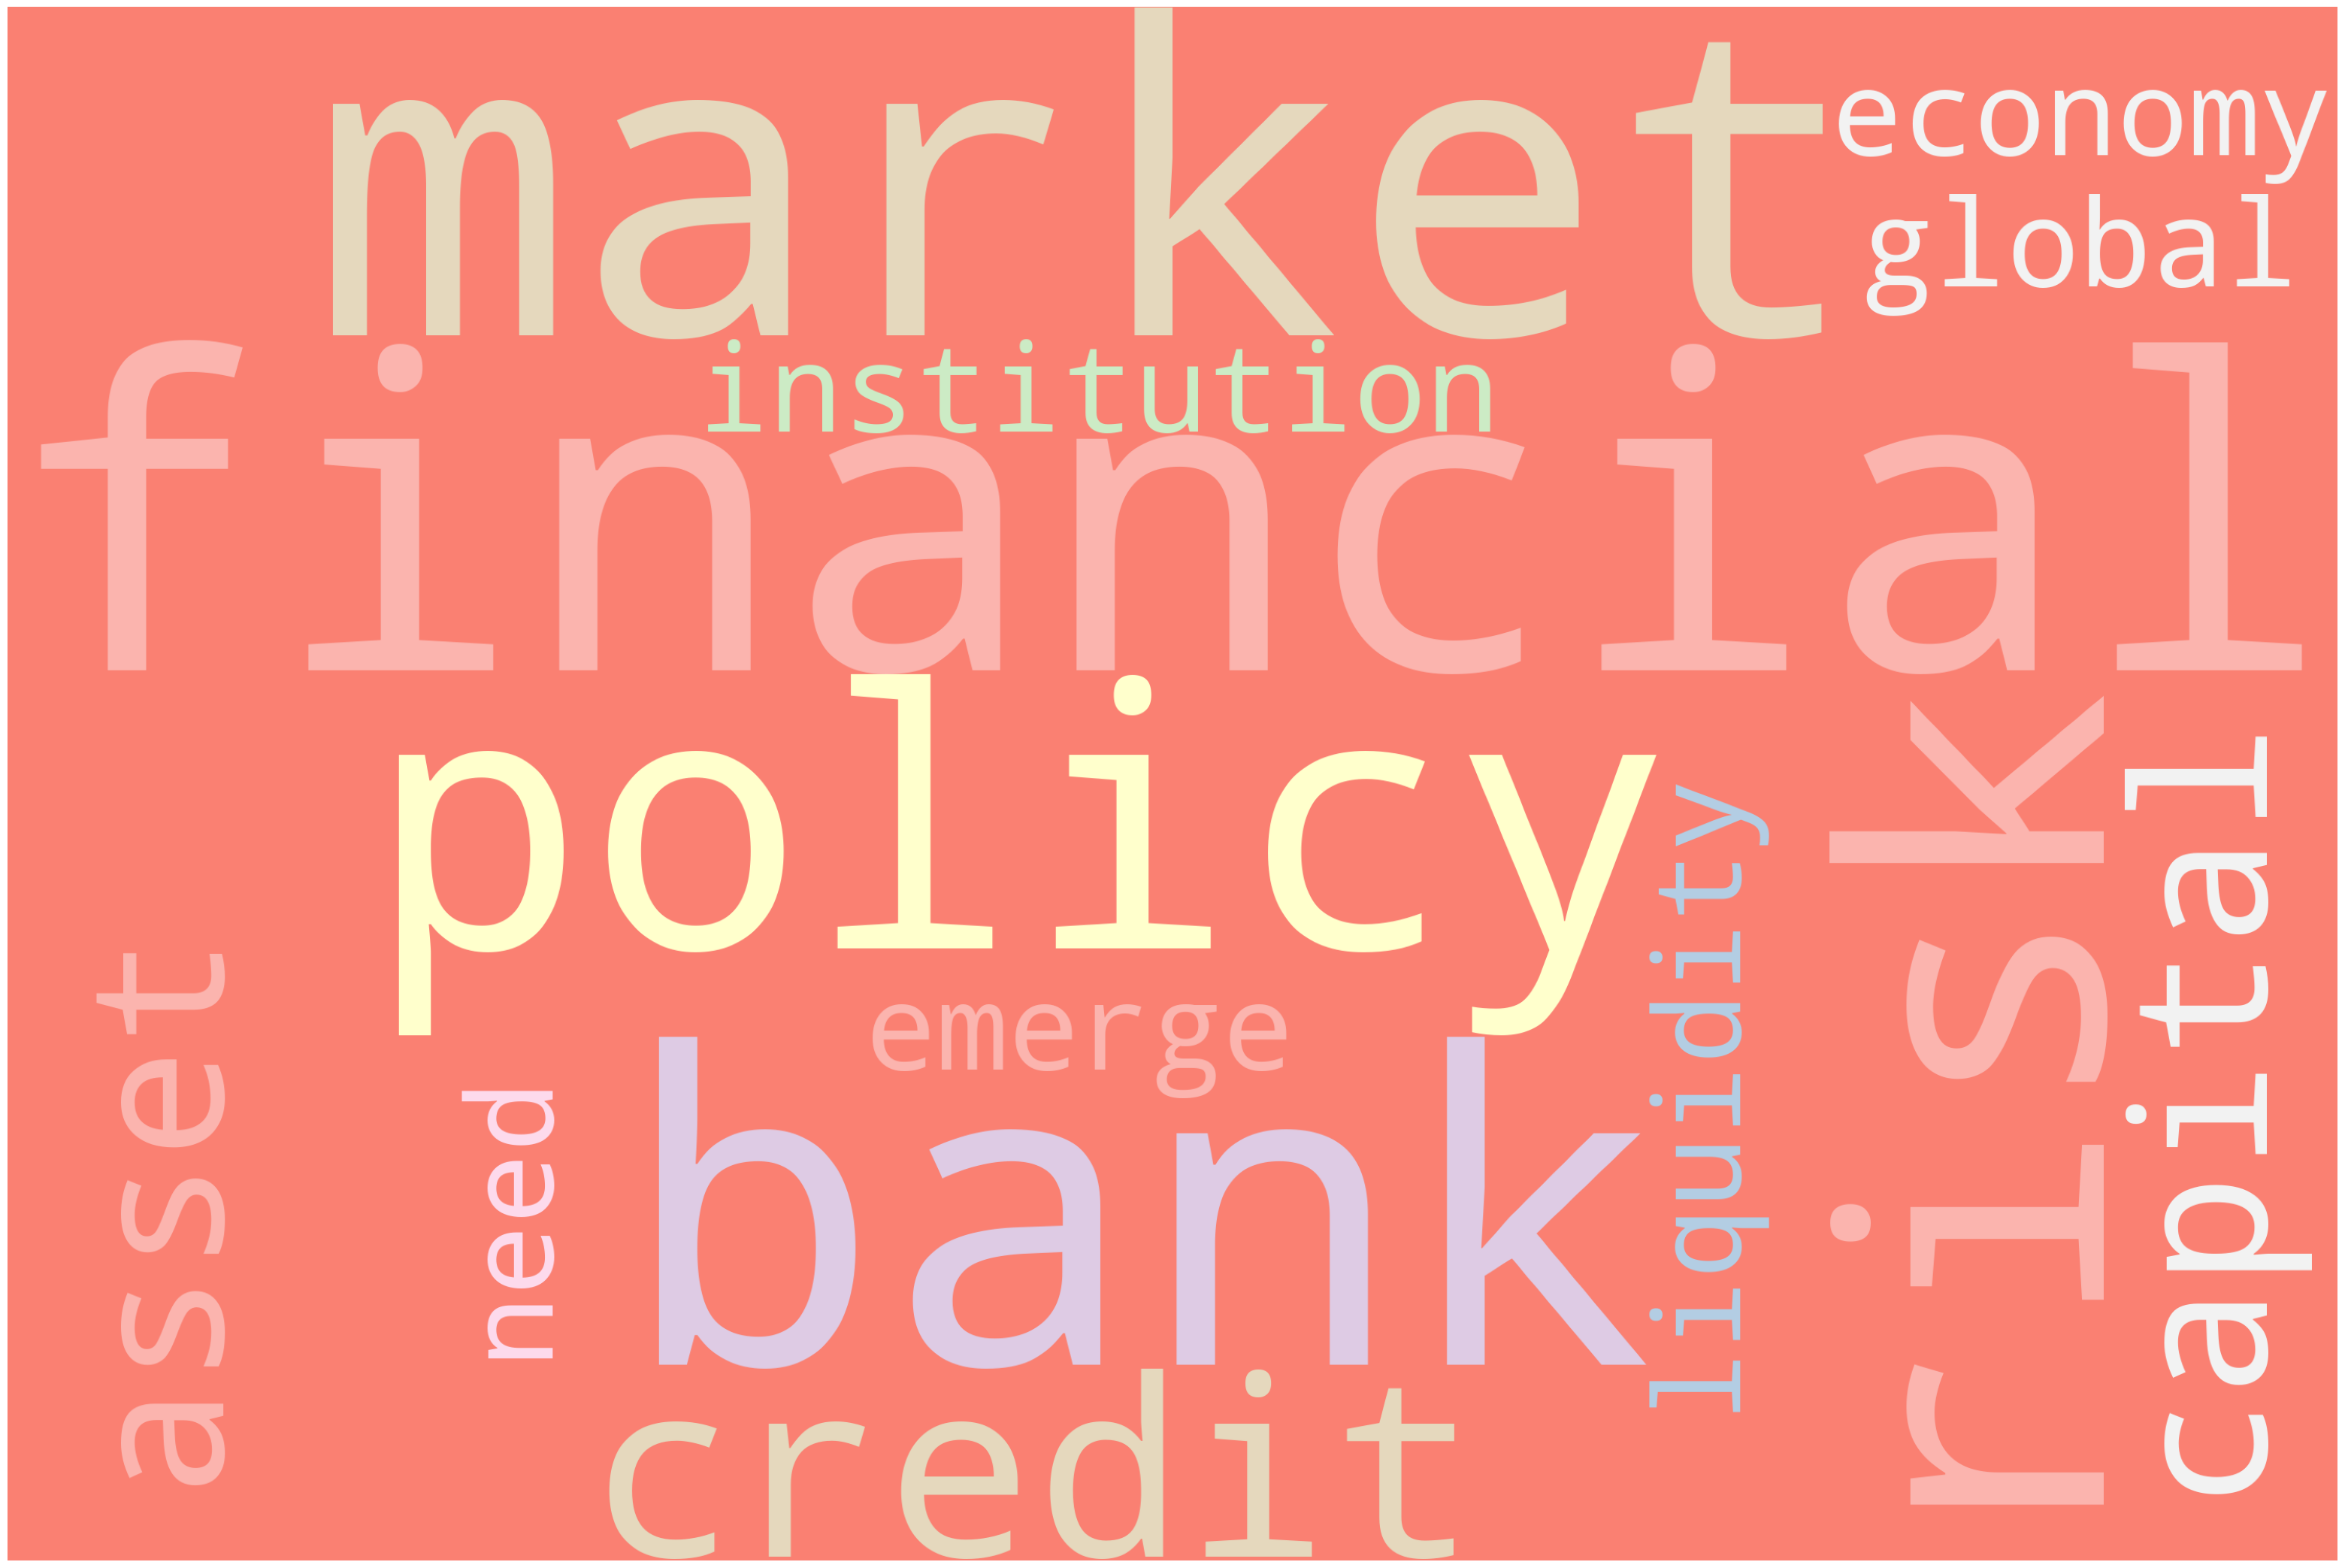

In [48]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [49]:
y=df_dominant_topic['Keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(y)
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
print(keyword_counts)

0       [financial, bank, market, policy, risk, asset,...
1       [market, risk, financial, bank, need, emerge, ...
2       [market, risk, financial, bank, need, emerge, ...
3       [financial, bank, market, policy, risk, asset,...
4       [market, risk, financial, bank, need, emerge, ...
                              ...                        
3374    [financial, bank, market, policy, risk, asset,...
3375    [financial, bank, market, policy, risk, asset,...
3376    [financial, bank, market, policy, risk, asset,...
3377    [financial, bank, market, policy, risk, asset,...
3378    [financial, bank, market, policy, risk, asset,...
Name: Keywords, Length: 3379, dtype: object
['financial', 'bank', 'market', 'policy', 'risk', 'asset', 'capital', 'credit', 'institution', 'global', 'market', 'risk', 'financial', 'bank', 'need', 'emerge', 'policy', 'liquidity', 'economy', 'credit', 'market', 'risk', 'financial', 'bank', 'need', 'emerge', 'policy', 'liquidity', 'economy', 'credit', 'financial'

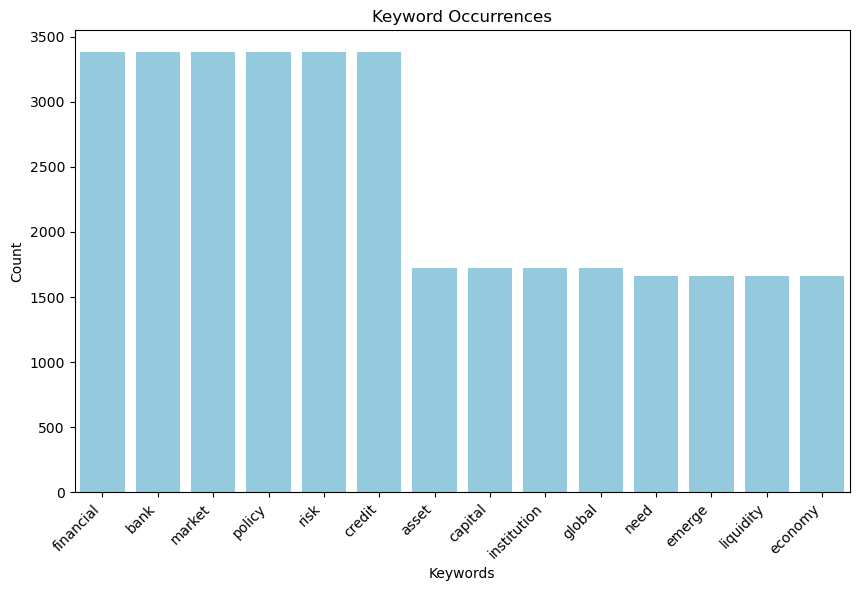

In [50]:
# Create a bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts[:30].index, y=keyword_counts[:30].values, color='skyblue')
plt.title('Keyword Occurrences')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()